# **Neural Network**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#loading datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path2 = "/content/drive/MyDrive/emnist-letters-test.csv"
path1 = "/content/drive/MyDrive/emnist-letters-train.csv"

Train0 = pd.read_csv(path1, header = None)
Train1 = Train0.to_numpy()

Test0 = pd.read_csv(path2, header = None)
Test1 = Test0.to_numpy()

In [ ]:
def standardisation(A):
  A_mean = np.mean(A, axis = 0)
  A_std_dev = np.std(A, axis = 0)
  A_standardised = (A - A_mean)/ A_std_dev
  return A_standardised

def feature_scaling(A) : 
  return np.divide(A, 256)

In [ ]:
X_train0 = Train1[:,1:]
X_train1 = feature_scaling(X_train0)

In [ ]:
X_test0 = Test1[:,1:]
X_test1 = feature_scaling(X_test0)

In [ ]:
X_train1.shape

(88800, 784)

In [ ]:
P = np.sum(X_train1, axis =1)
P.shape

(88800,)

In [ ]:
X_train2 = X_train1.T
X_train2.shape

(784, 88800)

In [ ]:
X_test2 = X_test1.T

In [ ]:
def Neural_2_layered( iterations, alpha, X, Y) :
  #prefferable no. of nodes in hidden layer = sqrt(input layer node * output layer node), here it is approx 142
  theta1 = np.random.random([X.shape[0], 142]) - 0.5
  theta2 = np.random.random([142,26]) - 0.5
  b1 = (np.ones((142, 1)))*0.01
  b2 = (np.ones((26, 1)))*0.01
  m = X.shape[1]
  
 
  for i in range(iterations):
    #forward propopgation
    superscript1 = (np.dot (theta1.T,X) + b1) #88800,142 -- 142,88800 -- 142,1 broadcasted -- 88800,142
    Act1  = 1/(1+(np.exp(-superscript1))) #88800,142

    superscript2 = (np.dot (theta2.T,Act1) + b2) #88800,26 -- 26,88800 -- 26,1 broadcasted -- 88800,26
    Act2 = 1/(1+(np.exp(-superscript2))) #26
    
    cost = (1/m)*(np.sum(-Y*(np.log(Act2)) - ((1-Y)*(np.log(1-Act2))))) 

    #backward propogation
    dZ2 = (Act2 - Y) #88800,26 
    dtheta2 = (1/m) * np.dot(Act1, dZ2.T) #142,26
    db2 = (1/m) * (np.sum(dZ2, axis = 1)).reshape(26,1) #88800,1
    
    der_Act1 = Act1*(1-Act1) #88800,142
    dZ1 = np.multiply(np.dot(theta2,dZ2), der_Act1) #88800,142
    dtheta1 = (1/m) * np.dot(X, dZ1.T) #784,142
    db1 = (1/m) * (np.sum(dZ1, axis = 1)).reshape(142,1) #88800,1

    

    #parameters update
    theta_1 = theta1 - alpha*dtheta1
    theta1 = theta_1
    b_1 = b1 - alpha*db1
    b1 = b_1

    theta_2 = theta2 - alpha*dtheta2
    theta2 = theta_2
    b_2 = b2 - alpha*db2
    b2 = b_2

    plt.scatter(i, cost)
    #plt.scatter(i, theta)  theta is a vector this doesnt make any sense
    #if i == 100 :
    print (cost)
     
  return theta1, theta2, b1, b2, Act2

In [ ]:
Training_label = Train1[:,0]

In [ ]:
#Y should be only 0 or 1
Y_train = np.zeros((Train1.shape[0], 26))
for i in range(Train1.shape[0]):
    Y_train[i, Training_label[i]-1] = 1
pd.DataFrame(Y_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88797,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
Y_train1 = Y_train.T

25.25541709171644
27.512043745575248
20.1913761467681
15.176960751402461
11.157167039028312
9.218708907880522
7.501721549267551
6.327462996869734
5.534364516623042
4.997177945966276
4.63259544288199
4.373697074972317
4.2138242239083805
4.119960684186848
4.054120129324079
4.000627210193529
3.951295331904843
3.9023053369263065
3.8539494051204737
3.8069020061894476
3.7616811672585455
3.7185116696351685
3.6773498651824705
3.638011268942292
3.600270181451011
3.5639066729499373
3.5287233959211677
3.4945530399919846
3.461263870751273
3.4287632114844135
3.3969975417253675
3.365948724288759
3.3356260424844413
3.3060545295135415
3.2772621154927033
3.249268621015278
3.2220785904620137
3.1956786704479416
3.1700392318830835
3.145119223033996
3.1208722890374108
3.0972520135241757
3.0742152271482586
3.0517235376402465
3.0297437212893708
3.008247572793885
2.9872116147226735
2.9666168751662045
2.946448783062855
2.9266971056164746
2.9073557667756558
2.888422362951805
2.8698972589388165
2.851782294346828

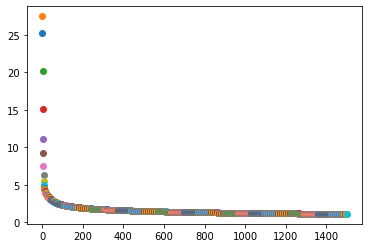

In [ ]:
theta1, theta2, b1, b2, Act2 = Neural_2_layered(1500, 1.5
, X_train2, Y_train1)

In [ ]:
s1 = np.dot (theta1.T,X_test2) + b1 
A1  = 1/(1+(np.exp(-s1)))
s2 = np.dot (theta2.T,A1) + b2
A2 = 1/(1+(np.exp(-s2)))

In [ ]:
A2.shape

(26, 14800)

In [ ]:
Y_pred_max = np.argmax(A2, axis =0)

In [ ]:
Y_pred_max.shape

(14800,)

In [ ]:
Y_Test = Test1[:,0]

In [ ]:
count = 0 
for i in range(Y_Test.shape[0]):
    if Y_Test[i] == Y_pred_max[i] + 1:
        count+=1

In [ ]:
count

11760

In [ ]:
accuracy = (count/14799)*100

In [ ]:

accuracy

79.46482870464222

In [ ]:
'''
def Neural_3_layered( iterations, alpha, X, Y) :
  #prefferable no. of nodes in hidden layer = sqrt(input layer node * output layer node), here it is approx 142
  theta1 = np.zeros((X.shape[1], 142))
  theta2 = np.zeros((142, 61))
  theta3 = np.zeros((61, 26))
  b1 = np.ones((X.shape[0], 142))
  b2 = np.ones((X.shape[0], 61))
  b3 = np.ones((X.shape[0], 26))
  m = X.shape[0]

 
  for i in range(iterations):
    #forward propopgation
    superscript1 = np.dot (X, theta1) + b1
    Act1  = 1/(1+(np.exp(-superscript1)))

    superscript2 = np.dot (Act1, theta2) + b2
    Act2 = 1/(1+(np.exp(-superscript2)))

    superscript3 = np.dot (Act2, theta3) + b3
    Act3 = 1/(1+(np.exp(-superscript3)))
    
    cost = (1/m)*(np.sum(-Y*(np.log(Act2)) - ((1-Y)*(np.log(1-Act2)))))

    #backward propogation
    dZ2 = (Act2 - Y)
    dtheta2 = (1/m) * np.dot(Act1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)  #keepdims helps to maintain it as a 2d array
    
    der_Act1 = Act1*(1-Act1)
    dZ1 = np.multiply(np.dot(dZ2, theta2.T), der_Act1)
    dtheta1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)

    

    #parameters update
    theta_1 = theta1 - alpha*dtheta1
    theta1 = theta_1
    b_1 = b1 - alpha*db1
    b1 = b_1

    theta_2 = theta2 - alpha*dtheta2
    theta2 = theta_2
    b_2 = b2 - alpha*db2
    b2 = b_2

    theta_3 = theta3 - alpha*dtheta3
    theta3 = theta_3
    b_3 = b3 - alpha*db3
    b3 = b_3

    plt.scatter(i, cost)
    #plt.scatter(i, theta)  theta is a vector this doesnt make any sense
    #if i == 100 :
    print (cost)
     
  return theta1, theta2, b1, b2, Act2
'''